# Customer Segmentation Using RFM Analysis

## Menentukan Pertanyaan Bisnis

- Bagaimana Demografi Pelanggan E-Commerce?
- Bagaimana Ketepatan Estimasi Pengiriman pada E-Commerce ini?
- Seller dengan Revenue Terbesar dan Terkecil?
- Produk Apa yang Paling Best Seller?
- Bagaimana Performa Penjualan dan Revenue dalam Beberapa Bulan Terakhir?

Analisis Korelasi
- Bagaimana waktu pengemasan mempengaruhi rating yang diberikan?
- Bagaimana waktu pengiriman mempengaruhi rating yang diberikan?

Analisis RFM
- Berapa lama waktu yang telah berlalu sejak pembelian terakhir pelanggan?
- Berapa frekuensi pembelian yang dilakukan oleh pelanggan dalam beberapa bulan terakhir?
- Berapa total nilai pembelian yang dilakukan oleh pelanggan?
- Bagaimana segmentasi pelanggan yang terbentuk?

## Menyiapkan Semua Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Fara Rizkhi Karunia\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Data Wrangling

Terdapat 7 tabel pada dataset E-Commerce Public, namun tidak semua tabel dibutuhkan dalam analisis yang akan dilakukan. Oleh karena itu dalam proyek analisis data ini saya hanya mengambil 4 tabel untuk dianalisis

### Gathering Data

#### Memuat Tabel Customers

In [2]:
customers_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Memuat Tabel Order_items

In [3]:
order_items_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Memuat Tabel Orders

In [4]:
orders_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders_df["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

#### Memuat Tabel Order_reviews

In [6]:
order_reviews_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Memuat Tabel products_df

In [7]:
products_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Memuat Tabel products_category_english

In [8]:
products_category_english_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\product_category_name_translation.csv")
products_category_english_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Memuat Tabel geolocation_df

In [9]:
geolocation_df = pd.read_csv(r"C:\Users\Fara Rizkhi Karunia\Documents\Dicoding\ID CAMP 23\Analisis Data dengan Python\Submission Dicoding\Dataset\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assesing Data

#### Pemeriksaan Tabel customers_df

- **Memeriksa Tipe Data**

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan pemeriksaan tersebut, tipe data yang digunakan pada tabel customers_df sudah sesuai.

- **Pengecekan Missing Value**

In [11]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Berdasarkan pengecekan diatas, diketahui tidak terdapat missing value pada tabel customers_df.

- **Pengecekan Data Duplikat**

In [12]:
print("Jumlah data duplikat :", customers_df.duplicated().sum())

Jumlah data duplikat : 0


Tidak terdapat data duplikat pada tabel customers_df.

- **Pengecekan Parameter Statistik**

In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Tidak terdapat kejanggalan pada parameter statistik diatas.

#### Pemeriksaan Tabel order_items_df

- **Memeriksa Tipe Data**

In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada tabel order_items_df diatas terdapat kejanggalan pada kolom **shipping_limit_date** dengan tipe data seharusnya adalah **datetime** namun disini tertulis **object**.

- **Pengecekan Missing Value**

In [15]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak terdapat missing value pada tabel order_items_df diatas

- **Pengecekan Data Duplikat**

In [16]:
print("Jumlah data duplikat :", order_items_df.duplicated().sum())

Jumlah data duplikat : 0


Tidak terdapat data duplikat pada tabel order_items_df diatas

- **Pengecekan Parameter Statistik**

In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tidak terdapat kejanggalan parameter statistik dalam tabel order_items_df

#### Pemeriksaan Tabel orders_df

- **Memeriksa Tipe Data**

In [18]:
 orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pada tabel orders_df terdapat kesalahan tipe data di kolom **order_purchase_timestamp** sampai dengan **order_estimated_delivery_date**. Lalu terdapat beberapa perbedaan jumlah data yang memungkinkan adanya missing value.

- **Pengecekan Missing Value**

In [19]:
 orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Pada pengecekan missing value diatas, terbukti terdapat **160 missing value** pada kolom **order_approved_at**, **1783 missing value** pada **order_delivered_carrier_date**, dan **2965 missing value** pada **order_delivered_customer_date**

- **Pengecekan Data Duplikat**

In [20]:
print("Jumlah data duplikat :",  orders_df.duplicated().sum())

Jumlah data duplikat : 0


Tidak terdapat data duplikat pada tabel orders_df

- **Pengecekan Parameter Statistik**

In [21]:
 orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Pemeriksaan Tabel order_reviews_df

- **Memeriksa Tipe Data**

In [22]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Dari hasil pengecekan diatas didapatkan beberapa kesalahan tipe data pada **review_creation_date** dan **review_answer_timestamp**, dimana kolom tersebut seharusnya bertipe data datetime. Lalu terdapat perbedaan jumlah data dibeberapa kolom

- **Pengecekan Missing Value**

In [23]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dari hasil pengecekan diatas terdapat beberapa missing value yang harus diatasi

- **Pengecekan Data Duplikat**

In [24]:
print("Jumlah data duplikat :", order_reviews_df.duplicated().sum())

Jumlah data duplikat : 0


Tidak terdapat data duplikat pada tabel order_reviews diatas

- **Pengecekan Parameter Statistik**

In [25]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Dari tabel order_reviews, tidak terdapat kejanggalan dalam kolom review_score. Namun dari pengecekan ini dapat diketahui kolom review score memiliki rentang antara 1-5

#### Pemeriksaan Tabel products_df

- **Memeriksa Tipe Data**

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Dari data diatas tidak terdapat ketidaksesuaian tipe data, namun terdapat perbedaan jumlah data antar kolom.

- **Pengecekan Missing Value**

In [27]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terbukti dari pengecekan diatas, data memiliki beberapa missing value di beberapa kolom

- **Pengecekan Data Duplikat**

In [28]:
print("Jumlah data duplikat :", products_df.duplicated().sum())

Jumlah data duplikat : 0


Tidak terdapat data duplikat pada tabel tersebut

- **Pengecekan Parameter Statistik**

In [29]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak terdapat kejanggalan pada tabel tersebut.

#### Pemeriksaan Tabel products_category_english_df

- **Memeriksa Tipe Data**

In [30]:
products_category_english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Dari data diatas tidak terdapat ketidaksesuaian tipe data.

- **Pengecekan Missing Value**

In [31]:
products_category_english_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Terbukti dari pengecekan diatas, data tidak memiliki missing value.

- **Pengecekan Data Duplikat**

In [32]:
print("Jumlah data duplikat :", products_category_english_df.duplicated().sum())

Jumlah data duplikat : 0


Tidak terdapat data duplikat pada tabel tersebut

- **Pengecekan Parameter Statistik**

In [33]:
products_category_english_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak terdapat kejanggalan pada tabel tersebut.

#### Pemeriksaan Tabel geolocation_df

- **Memeriksa Tipe Data**

In [34]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Dari data diatas tidak terdapat ketidaksesuaian tipe data.

- **Pengecekan Missing Value**

In [35]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Terbukti dari pengecekan diatas, data tidak memiliki missing value.

- **Pengecekan Data Duplikat**

In [36]:
print("Jumlah data duplikat :", geolocation_df.duplicated().sum())

Jumlah data duplikat : 261836


Terdapat 261831 data duplikat di tabel tersebut

Dari proses Assesing data, ditemukan beberapa permasalahan yang harus diatasi sebelum dilakukannya proses analisis data. Beberapa kesalahan tersebut adalah sebagai berikut :

**Pada tabel order_items_df**
1. Kesalahan tipe data kolom shipping_limit_date
**Pada tabel orders_df**
1. Kesalahan tipe data pada kolom order_purchase_timestamp sampai dengan order_estimated_delivery_date
2. Missing value pada kolom :
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
**Pada tabel order_reviews**
1. Kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp
2. Missing value pada review_comment_title dan review_comment_message

**Pada tabel products_df**
1. Missing Value pada kolom product_category_name, dan beberapa kolom lainnya

**Pada tabel geolocation_df**
1. Terdapat data duplikat yang harus dihapus

### Cleaning Data

Untuk mengatasi permasalahan yang ditemukan pada proses assesing data, dilakukan pembersihan data pada proses cleaning data.

**Membersihkan data pada tabel order_items_df**

1. Mengatasi kesalahan tipe data pada kolom shipping_limit_date

In [37]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [38]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Tipe data pada shipping_limit_date sudah berubah menjadi datetime, maka masalah teratasi!

**Membersihkan data pada tabel orders_df**

1. Mengatasi kesalahan tipe data pada kolom order_purchase_timestamp sampai dengan order_estimated_delivery_date

In [39]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                    "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Tipe data pada beberapa kolom tanggal yang salah sudah berubah menjadi datetime, maka masalah teratasi!

2. Mengatasi Missing Value

Mengatasi missing value pada kolom **Order_approved_at** yang merupakan kolom yang berisi tanggal dimana orderan telah diterima oleh seller, untuk mengatasi Missing Value pada kolom ini saya melakukan teknik filtering sebelum menentukan metode apa yang akan saya ambil dalam mengatasi Missing Value ini

In [41]:
# display data rows that contain missing values
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Setelah dilakukan filtering, saya menemukan kemungkinan kolom tersebut kosong adalah karna order_statusnya yang cancelled. Maka saya akan mengecek order_status lain yang memungkinkan terjadinya missing value di kolom order_delivered_carrier_date dan order_delivered_customer_date.

In [42]:
# Check the number of order status
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Setelah dilakukan pengecekan, ditemukan fakta bahwa kolom-kolom tersebut kosong karna belum selesainya status orderan atau adanya orderan yang dicancel. Saya tidak bisa menggunakan dropping method disini karena hal tersebut akan menghapus beberapa data dengan status selain "delivered". Jadi saya akan mengisi kolom-kolom kosong tersebut dengan metode imputation dan mengisinya dengan tanggal purchased date.

In [43]:
# Resolve Missing Value and fill it with value from order_purchase_timestamp column
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])

In [44]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing value pada kolom order_approved_at teratasi, selanjutnya saya akan coba mengatasi missing value pada kolom **order_delivered_carrier_date**

Mengatasi missing value pada kolom **order_delivered_carrier_date** yang merupakan kolom yang berisi tanggal dimana orderan dalam proses pengiriman oleh jasa kirim, untuk mengatasi Missing Value pada kolom ini saya melakukan teknik filtering sebelum menentukan metode apa yang akan saya ambil dalam mengatasi Missing Value ini

In [45]:
## menampilkan baris data yang mengandung missing value pada kolom order_delivered_carrier_date
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Sama seperti kolom sebelumnya setelah dilakukan pengecekan, ditemukan fakta bahwa kolom-kolom tersebut kosong karna belum selesainya status orderan atau adanya orderan yang dicancel. Jadi saya akan mengisi kolom-kolom kosong tersebut dengan metode imputation dan mengisinya sama dengan tanggal order_approved_at.

In [46]:
#  Resolve Missing Value and fill it with value from order_approved_at
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'])

In [47]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing value pada kolom order_delivered_carrier_date teratasi, saatnya mengatasi missing value pada kolom **order_delivered_customer_date**

Mengatasi missing value pada kolom **order_delivered_customer_date** yang merupakan kolom yang berisi tanggal dimana barang telah diterima oleh customer, untuk mengatasi Missing Value pada kolom ini saya melakukan teknik filtering sebelum menentukan metode apa yang akan saya ambil dalam mengatasi Missing Value ini

In [48]:
## menampilkan baris data yang mengandung missing value pada kolom order_delivered_customer_date
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-13 13:25:17,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-07 06:15:14,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-09-03 14:30:09,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-09 07:18:05,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-28 15:44:47,NaT,2017-09-15


Karna sama dengan kolom sebelumnya, saya akan mengisi kolom-kolom kosong tersebut dengan metode imputation dan mengisinya sama dengan tanggal order_delivered_carrier_date

In [49]:
#            # Resolve Missing Value and fill it with value from order_delivered_carrier_date
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'])

In [50]:
# Checking Missing Values
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Masalah Missing Value pada tabel Orders_id teratasi! Selanjutnya melakukan pengecekan inaccurate value yang mungkin terjadi dan mengatasinya.

- **Pengecekan Inaccurate Value**

Perlu dilakukan pengecekan pada tanggal order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Karna kolom tersebut merupakan kolom tanggal yang akan berurutan prosesnya maka kolom dengan indeks besar tidak boleh lebih kecil dari kolom sebelumnya agar tidak menghasilkan nilai negatif. Pengecekan ini tidak dapat dilakukan pada tahap assessing data dikarenakan kesalahan tipe data yang belum diatasi. Maka pengecekan ini dilakukan setelah diatasinya kesalahan tipe data

In [51]:
# Inaccurate Value : Pengecekan nilai negatif pada order_approved_at-order_purchase_timestamp
orders_df["approved_time"]=orders_df["order_approved_at"]-orders_df["order_purchase_timestamp"]
orders_df["approved_days"]=orders_df["approved_time"].dt.days

orders_df["approved_days"].describe()

count    99441.000000
mean         0.269366
std          0.985467
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        187.000000
Name: approved_days, dtype: float64

Dilihat dari nilai minimum, tidak terdapat nilai negatif pada dataframe approved_days.

In [52]:
# Inaccurate Value : Checking for negative values in order_delivered_carrier_date - order_approved_at
orders_df["packing_time"]=orders_df["order_delivered_carrier_date"]-orders_df["order_approved_at"]
orders_df["packing_days"]=orders_df["packing_time"].dt.days


orders_df["packing_days"].describe()

count    99441.000000
mean         2.260738
std          3.541257
min       -172.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: packing_days, dtype: float64

Karna nilai minimum dari data diatas terdapat yang negatif maka hal ini menjadi sebuah catatan pada proses cleaning data untuk diatasi.

In [53]:
# Resolving negative value in the "packing_days" column by replacing it with the average packing days
orders_df.loc[orders_df["packing_days"] < 0, "packing_days"] = orders_df["packing_days"].mean()

# Replacing order_delivered_carrier_date date by adding average "packing_days" to "order_approved_at"
orders_df["order_delivered_carrier_date"] = orders_df["order_approved_at"] + pd.to_timedelta(orders_df["packing_days"], unit='D')

# Rechecking
orders_df["packing_days"].describe()

count    99441.000000
mean         2.315698
std          3.464422
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: packing_days, dtype: float64

Permasalahan sudah teratasi, sudah tidak ada lagi inaccurate value pada kolom tersebut.

In [54]:
# Inaccurate Value : Checking for negative values in order_delivered_customer_date-order_delivered_carrier_date
orders_df["shipping_time"]=orders_df["order_delivered_customer_date"]-orders_df["order_delivered_carrier_date"]
orders_df["shipping_days"]=orders_df["shipping_time"].dt.days


orders_df["shipping_days"].describe()

count    99441.000000
mean         9.009976
std          8.787853
min        -16.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        205.000000
Name: shipping_days, dtype: float64

Karna nilai minimum dari data diatas terdapat yang negatif maka hal ini menjadi sebuah catatan pada proses cleaning data untuk diatasi.

In [55]:
# Resolving negative value in the "shipping_days" column by replacing it with the average shipping days
orders_df.loc[orders_df["shipping_days"] < 0, "shipping_days"] = orders_df["shipping_days"].mean()

# Replacing order_delivered_customer_date by adding average "shipping_days" to "order_delivered_carrier_date"
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_carrier_date"] + pd.to_timedelta(orders_df["shipping_days"], unit='D')

# Rechecking
orders_df["shipping_days"].describe()

count    99441.000000
mean         9.054322
std          8.758264
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        205.000000
Name: shipping_days, dtype: float64

Permasalahan sudah teratasi, sudah tidak ada lagi inaccurate value pada kolom tersebut.

In [56]:
# Menghapus tabel approved_time, packing_time, dan shipping_time karna tidak diperlukan lagi
hapus = ["approved_time", "packing_time", "shipping_time"]
orders_df = orders_df.drop(hapus, axis=1)

#pengecekan
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_days,packing_days,shipping_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 11:07:15,2017-10-10 11:07:15,2017-10-18,0,2.0,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 03:24:27,2018-08-07 03:24:27,2018-08-13,1,0.0,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 08:55:23,2018-08-17 08:55:23,2018-09-04,0,0.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-21 19:45:59,2017-12-01 19:45:59,2017-12-15,0,3.0,10.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-13 22:20:29,2018-02-15 22:20:29,2018-02-26,0,0.0,2.0


**Membersihkan data pada tabel order_reviews**

Pada tabel order_reviews, terdapat 2 permasalahan sebagai berikut :
1. Kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp
2. Missing value pada review_comment_title dan review_comment_message

Namun, kolom-kolom tersebut tidak dibutuhkan dalam proses analisis data yang akan dilakukan. Maka, saya memutuskan untuk menghapus beberapa kolom pada tabel order_reviews

In [57]:
hapus_kolom = ["review_comment_title", "review_comment_message",
               "review_creation_date", "review_answer_timestamp"]
order_reviews_df = order_reviews_df.drop(hapus_kolom, axis=1)
order_reviews_df.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


#### Membersihkan Data pada Tabel Customers

Meskipun tidak terdapat permasalahan pada tabel data customers_id, namun saya akan menghapus beberapa kolom yang tidak dibutuhkan dalam proses analisis data ini yaitu kolom customer_unique_id

In [58]:
hapus_kolom = ["customer_unique_id"]
customers_df = customers_df.drop(hapus_kolom, axis=1)
customers_df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


#### Membersihkan Data pada Tabel products_df

Missing Value pada kolom product_category_name, dan beberapa kolom lainnya. Dalam proses analisi data kolom yang dibutuhkan pada tabel ini hanya kolom product_id dan product_category_name. Jadi kolom selain itu akan dihapus menggunakan drop()

In [59]:
# Menghapus kolom tidak dibutuhkan
kolom_hapus = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
products_df = products_df.drop(kolom_hapus, axis=1)

In [60]:
# menampilkan baris data yang mengandung missing value pada kolom product_category_name
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN
154,46b48281eb6d663ced748f324108c733,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN


In [61]:
# Mengatasi Missing Value dan mengisinya dengan "no category"
products_df['product_category_name'] = products_df['product_category_name'].fillna("no category")

In [62]:
# pengecekan ulang
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name


Setelah dilakukan pengecekan sudah tidak ada lagi missing value pada kolom product_category_name, maka masalah dapat teratasi

#### Membersihkan Data pada Tabel geolocation_df

In [63]:
# Melakukan penghapusan kolom data duplikat
geolocation_df.drop_duplicates(inplace=True)

In [64]:
geolocation_df.duplicated().sum()

0

## Exploratory Data Analysis

### Eksplorasi Data Customers_df

In [65]:
customers_df.describe(include="all")

,customer_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441.000000,99441,99441
unique,99441,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,NaN,sao paulo,SP
freq,1,NaN,15540,41746
mean,NaN,35137.474583,NaN,NaN
std,NaN,29797.938996,NaN,NaN
min,NaN,1003.000000,NaN,NaN
25%,NaN,11347.000000,NaN,NaN
50%,NaN,24416.000000,NaN,NaN
75%,NaN,58900.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik diatas diketahui data tersebut memiliki 99441 pelanggan yang tersebar pada 4119 kota dan 27 negara bagian. 

In [66]:
# Demografi pelanggan berdasarkan kota (customer_city)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [67]:
# Demografi pelanggan berdasarkan negara bagian (customer_state)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Eksplorasi Data Orders_df

In [68]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_days,packing_days,shipping_days
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000,99441.000000,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 02:41:57.487104256,2018-01-12 04:00:10.922364928,2018-01-24 03:08:37.730111232,0.269366,2.315698,9.054322
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 10:26:40,2016-10-04 10:26:40,2016-09-30 00:00:00,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 13:10:18,2017-09-22 04:06:14,2017-10-03 00:00:00,0.000000,0.000000,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 02:11:32,2018-01-31 17:13:02,2018-02-15 00:00:00,0.000000,1.000000,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-07 16:15:36,2018-05-14 20:30:45,2018-05-25 00:00:00,0.000000,3.000000,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,187.000000,125.000000,205.000000


**Penambahan kolom baru berupa delivery_status**

Delivery status ini nantinya berisi keterangan paket sampai sesuai dengan estimasi pengiriman. Terdapat 3 kriteria yaitu "arrived quicker", "on scheduled", dan "arrived longer"

In [69]:
# Menambahkan kolom "delivery_deviation"
orders_df['delivery_deviation'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']

# Menambahkan kolom "delivery_status" berdasarkan delivery_deviation
orders_df["delivery_status"] = orders_df["delivery_deviation"].apply(lambda x: "on scheduled" if x == pd.Timedelta(0) else "arrived quicker" if x > pd.Timedelta(0) else "arrived delayed")

# pengecekan
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_days,packing_days,shipping_days,delivery_deviation,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 11:07:15,2017-10-10 11:07:15,2017-10-18,0,2.0,6.0,7 days 12:52:45,arrived quicker
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 03:24:27,2018-08-07 03:24:27,2018-08-13,1,0.0,12.0,5 days 20:35:33,arrived quicker
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 08:55:23,2018-08-17 08:55:23,2018-09-04,0,0.0,9.0,17 days 15:04:37,arrived quicker
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-21 19:45:59,2017-12-01 19:45:59,2017-12-15,0,3.0,10.0,13 days 04:14:01,arrived quicker
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-13 22:20:29,2018-02-15 22:20:29,2018-02-26,0,0.0,2.0,10 days 01:39:31,arrived quicker


#### Menggabungkan Tabel costomers_df dengan orders_df

In [70]:
customers_orders_df = pd.merge (
    left= customers_df,
    right= orders_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
customers_orders_df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_days,packing_days,shipping_days,delivery_deviation,delivery_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-24 15:22:12,2017-06-05,0,6.0,2.0,11 days 08:37:48,arrived quicker
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-14 20:58:32,2018-01-28 20:58:32,2018-02-06,0,2.0,14.0,8 days 03:01:28,arrived quicker
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-10 16:19:10,2018-06-14 16:19:10,2018-06-13,1,21.0,4.0,-2 days +07:40:50,arrived delayed
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 17:29:19,2018-03-27 17:29:19,2018-04-10,0,14.0,0.0,13 days 06:30:41,arrived quicker
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 10:10:09,2018-08-09 10:10:09,2018-08-15,0,1.0,10.0,5 days 13:49:51,arrived quicker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-10 16:08:45,2018-04-13 16:08:45,2018-04-25,0,3.0,3.0,11 days 07:51:15,arrived quicker
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 08:35:12,2018-04-11 08:35:12,2018-04-20,0,1.0,6.0,8 days 15:24:48,arrived quicker
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-08 20:30:03,2018-05-08 20:30:03,2018-05-02,0,0.0,30.0,-7 days +03:29:57,arrived delayed
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-05 21:31:20,2017-11-15 21:31:20,2017-12-05,0,2.0,10.0,19 days 02:28:40,arrived quicker


### Eksplorasi Data Order_items_df

In [71]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [72]:
# Membuat kolom baru bernama revenue yang didapatkan dari perkalian antara price dan order_item
order_items_df["revenue"] = order_items_df["price"]*order_items_df["order_item_id"]

In [73]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


**Seller_id dengan revenue tertinggi dan terendah**

In [74]:
# 3 Seller_id dengan revenue tertinggi
seller_sort_rev_tinggi = order_items_df.groupby(by="seller_id").revenue.sum().sort_values(ascending=False).reset_index()
seller_sort_rev_tinggi.head(3)

,seller_id,revenue
0,7c67e1448b00f6e969d365cea6b010ab,292489.30
1,53243585a1d6dc2643021fd1853d8905,244941.39
2,4869f7a5dfa277a7dca6462dcf3b52b2,235628.51


In [75]:
# 3 Seller_id dengan revenue terendah
seller_sort_rev_rendah = order_items_df.groupby(by="seller_id").revenue.sum().sort_values(ascending=True).reset_index()
seller_sort_rev_rendah.head(3)

,seller_id,revenue
0,cf6f6bc4df3999b9c6440f124fb2f687,3.5
1,77128dec4bec4878c37ab7d6169d6f26,6.5
2,702835e4b785b67a084280efca355756,7.6


In [76]:
# Product_id yang paling best seller
product_best_seller = order_items_df.groupby(by="product_id").order_item_id.sum().sort_values(ascending=False).reset_index()
product_best_seller.head(5)

,product_id,order_item_id
0,422879e10f46682990de24d770e7f83d,793
1,aca2eb7d00ea1a7b8ebd4e68314663af,640
2,368c6c730842d78016ad823897a372db,551
3,53759a2ecddad2bb87a079a1f1519f73,545
4,99a4788cb24856965c36a24e339b6058,542


In [77]:
# Freight Value per items
order_items_df["freight_value_items"] = order_items_df["freight_value"]/order_items_df["order_item_id"]

order_items_df[["order_id", "order_item_id", "freight_value_items"]]

,order_id,order_item_id,freight_value_items
0,00010242fe8c5a6d1ba2dd792cb16214,1,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,19.93
2,000229ec398224ef6ca0657da4fc703e,1,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,18.14
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,8.72


### Eksplorasi Data order_reviews_df

In [78]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score
count,99224,99224,99224.000000
unique,98410,98673,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN
freq,3,3,NaN
mean,NaN,NaN,4.086421
std,NaN,NaN,1.347579
min,NaN,NaN,1.000000
25%,NaN,NaN,4.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


In [79]:
# Pengelompokan berdasarkan review score
order_reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

#### Menggabungkan tabel order_items_df dengan order_reviews_df

In [80]:
order_items_reviews_df = pd.merge (
    left= order_items_df,
    right= order_reviews_df,
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)
order_items_reviews_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,freight_value_items,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,f4028d019cb58564807486a6aaf33817,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5
...,...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5


#### Seller_id dengan rata-rata review score tertinggi

In [81]:
order_items_reviews_df.groupby(by="seller_id").review_score.mean().sort_values(ascending=False)

seller_id
1cd9e0cc1839d55516843def5600816d    5.0
9fbd5666d8618fa571c4230fafa09bd6    5.0
d3891911c2feae53c52fea2bd14054e5    5.0
702835e4b785b67a084280efca355756    5.0
a20d8058c866dbaeca014d2cd20ac62e    5.0
                                   ... 
913fd0ebba70bb919f7254a02239173c    1.0
1fa2d3def6adfa70e58c276bb64fe5bb    1.0
1f7dfad2cb384ea4d2d7e1ffbd78c407    1.0
92992bec39dde5766f590d3b1f46d465    1.0
88af55b4a7ca402b27df16f7c7c9b5d2    1.0
Name: review_score, Length: 3090, dtype: float64

Cukup banyak seller_id yang mendapatkan rata-rata review_score 5

### Eksplorasi Data Products_df

In [82]:
products_df.describe()

,product_id,product_category_name
count,32951,32951
unique,32951,74
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


terdapat 74 unique value pada product_category_name, hal ini berarti produk tersebut terbagi menjadi 74 kategori.

#### Menggabungkan tabel products_df dengan products_category_english_df

In [83]:
category_df = pd.merge (
    left= products_df,
    right= products_category_english_df,
    how = "inner",
    left_on = "product_category_name",
    right_on = "product_category_name"
)
category_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery


Karna yang dibutuhkan hanya kolom kategori dengan bahasa inggris, maka product_category_name dapat dihapus.

In [84]:
# menghapus kolom product_category_name
category_df = category_df.drop("product_category_name", axis=1)
category_df.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


In [85]:
# 3 Top Kategori Produk
category_df.groupby(by="product_category_name_english").product_id.count().sort_values(ascending=False).head(3)

product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
Name: product_id, dtype: int64

#### Menggabungkan Keseluruhan Tabel

In [86]:
# Menggabungkan customers_orders_df dengan order_items_reviews_df
df = pd.merge (
    left= customers_orders_df,
    right= order_items_reviews_df,
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,freight_value_items,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-24 15:22:12,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-14 20:58:32,2018-01-28 20:58:32,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-10 16:19:10,2018-06-14 16:19:10,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 17:29:19,2018-03-27 17:29:19,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 10:10:09,2018-08-09 10:10:09,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-10 16:08:45,2018-04-13 16:08:45,...,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,74.90,13.88,36e2cdbaa9f639b57c53b37ac798fee8,4
112368,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 08:35:12,2018-04-11 08:35:12,...,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,114.90,14.16,b273b431c3aedb4eed18643309652940,5
112369,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-08 20:30:03,2018-05-08 20:30:03,...,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,37.00,19.04,fa4f16891e6b2edd1354668d07f5648b,1
112370,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-05 21:31:20,2017-11-15 21:31:20,...,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,689.00,22.07,0bcdc9e450ea500811a8d39ee993cd47,5


In [87]:
# Menggabungkan keseluruhan tabel
all_df = pd.merge (
    left= df,
    right= category_df,
    how = "inner",
    left_on = "product_id",
    right_on = "product_id"
)
all_df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,freight_value_items,review_id,review_score,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-24 15:22:12,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 00:47:48,2017-11-27 00:47:48,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 00:47:48,2017-11-27 00:47:48,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,225.98,12.45,7fc63200f12eebb5f387856afdd63db8,1,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-18 22:22:56,2017-05-25 22:22:56,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-18 22:29:19,2018-02-27 22:29:19,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110745,f6c6d3e1e20969a5eed982163f959719,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 04:31:33,2018-07-26 04:31:33,...,9682ad2500ae8b2609e6a88eb0cbc5bb,0bf0150d5b9d60d9cd2906003332f085,2018-07-25 04:31:33,99.90,21.14,99.90,21.14,17e0e42ddf0dd7ebceff457b7c1da303,3,home_confort
110746,da37711b17efd5f2539e8196ab215f04,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-27 23:23:38,2017-03-29 23:23:38,...,aea06073397f809424f946979354c9f0,f45122a9ab94eb4f3f8953578bc0c560,2017-04-02 23:23:38,19.99,10.96,19.99,10.96,f3642bae4843d919c4c53ec1ff8fe26d,4,pet_shop
110747,184e0c2cfc746789643521df0e9ff904,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-10 23:50:32,2018-01-04 23:50:32,...,bbf975bffd2ae9ee52f513ae5c8a4b27,04aba03279157f6d4e0fe8ccaf21963c,2017-12-13 23:50:32,250.00,54.11,250.00,54.11,6dfe34036fd1f79225daeaca9cf083c2,4,health_beauty
110748,821a7275a08f32975caceff2e08ea262,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-04 18:08:41,2018-04-06 18:08:41,...,f6e0a9ce8a6e91c3a0ca2d3005911d20,cab85505710c7cb9b720bceb52b01cee,2018-04-10 18:08:41,84.90,7.46,84.90,7.46,260447daa5d738ced8f4e0bbee8a08a2,5,fashion_bags_accessories


In [88]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    110750 non-null  object         
 1   customer_zip_code_prefix       110750 non-null  int64          
 2   customer_city                  110750 non-null  object         
 3   customer_state                 110750 non-null  object         
 4   order_id                       110750 non-null  object         
 5   order_status                   110750 non-null  object         
 6   order_purchase_timestamp       110750 non-null  datetime64[ns] 
 7   order_approved_at              110750 non-null  datetime64[ns] 
 8   order_delivered_carrier_date   110750 non-null  datetime64[ns] 
 9   order_delivered_customer_date  110750 non-null  datetime64[ns] 
 10  order_estimated_delivery_date  110750 non-null  datetime

In [89]:
all_df[["order_purchase_timestamp", "revenue"]].describe()

,order_purchase_timestamp,revenue
count,110750,110750.000000
mean,2018-01-01 12:44:37.691458304,136.444951
min,2016-09-04 21:15:19,0.850000
25%,2017-09-14 08:05:20,45.000000
50%,2018-01-20 22:39:33,84.000000
75%,2018-05-05 15:14:23.750000128,149.900000
max,2018-09-03 09:06:57,13440.000000
std,NaN,215.959514


In [90]:
all_df["customer_state"].unique()

array(['SP', 'PA', 'RS', 'RJ', 'SC', 'MG', 'MT', 'BA', 'ES', 'PR', 'MS',
       'CE', 'MA', 'RN', 'TO', 'RR', 'PB', 'DF', 'GO', 'PE', 'PI', 'AP',
       'AM', 'AL', 'SE', 'RO', 'AC'], dtype=object)

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana Demografi Pelanggan E-Commerce?

#### Demografi Pelanggan Berdasarkan Kota

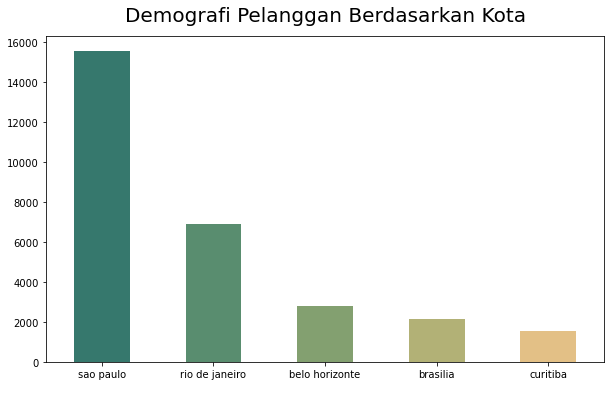

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64

In [91]:
city_counts = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
top_five = city_counts.head(5)

colors = ["#36786d", "#598d6f", "#83a070", "#b2b176", "#e3c086"]

# Plot diagram batang
plt.figure(figsize=(10, 6))
top_five.plot(kind='bar', color=colors)
plt.title('Demografi Pelanggan Berdasarkan Kota', y=1.025, size=20)

plt.xlabel(' ', y=1.025, size=12, weight='bold')
plt.xticks(rotation=0, ha='center')  # Optional: agar label sumbu x tidak tumpang tindih
plt.show()
city_counts.head()

#### Demografi Pelanggan Berdasarkan State

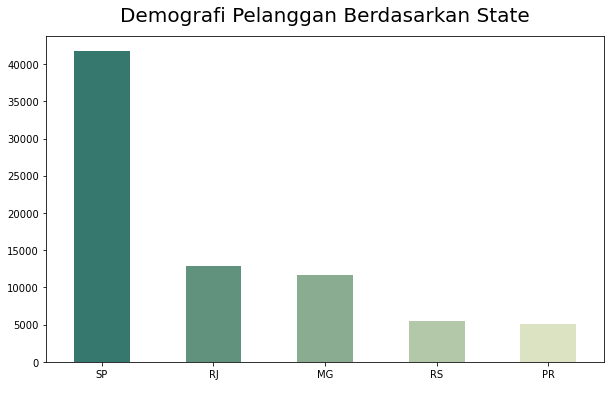

In [92]:
state_counts = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
top_five = state_counts.head(5)

colors = ["#36786d", "#61927e", "#8aad91", "#b3c8a8", "#dce3c3"]

# Plot diagram batang
plt.figure(figsize=(10, 6))
top_five.plot(kind='bar', color=colors)
plt.xlabel(" ")
plt.title('Demografi Pelanggan Berdasarkan State', y=1.025, size=20)
plt.xticks(rotation=0, ha='center')  # Optional: agar label sumbu x tidak tumpang tindih
plt.show()

### Pertanyaan 2 : Bagaimana Ketepatan Estimasi Pengiriman pada E-Commerce ini?

**Ketepatan Estimasi Pengiriman**

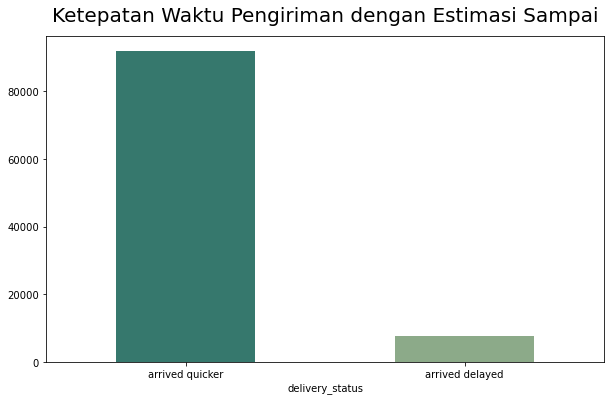

delivery_status
arrived quicker    91903
arrived delayed     7538
Name: order_id, dtype: int64

In [93]:
delivery = orders_df.groupby(by="delivery_status").order_id.nunique().sort_values(ascending=False)

colors = ["#36786d", "#8caa89", "#e3dcb6"]

# Plot diagram batang
plt.figure(figsize=(10, 6))
delivery.plot(kind='bar', color=colors)
plt.title('Ketepatan Waktu Pengiriman dengan Estimasi Sampai', y=1.025, size=20)
plt.xticks(rotation=0, ha='center')  # Optional: agar label sumbu x tidak tumpang tindih
plt.show()
delivery.head()

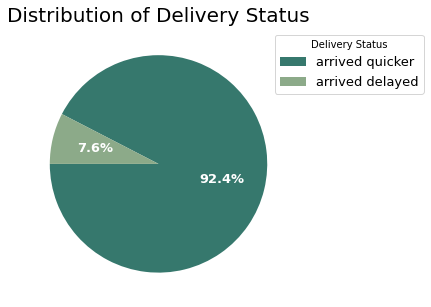

In [94]:
delivery = orders_df.groupby(by="delivery_status").order_id.nunique().sort_values(ascending=False)

colors = ["#36786d", "#8caa89", "#e3dcb6"]

plt.figure(figsize=(5, 5))
pie, texts, autotexts = plt.pie(delivery, autopct='%1.1f%%', colors=colors, startangle=180, textprops=dict(color="w"))  # Atur warna teks dengan textprops
plt.setp(autotexts, size=13, weight="bold")  # Atur ukuran dan tebal teks persentase
plt.title('Distribution of Delivery Status', size = 20)
plt.legend(delivery.index, title="Delivery Status", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13)
plt.show()

In [95]:
delivery.describe()

count        2.000000
mean     49720.500000
std      59655.063595
min       7538.000000
25%      28629.250000
50%      49720.500000
75%      70811.750000
max      91903.000000
Name: order_id, dtype: float64

### Pertanyaan 3 : Seller dengan Revenue Terbesar dan Terkecil

**Best and Worst Performing Seller by Total Revenue**

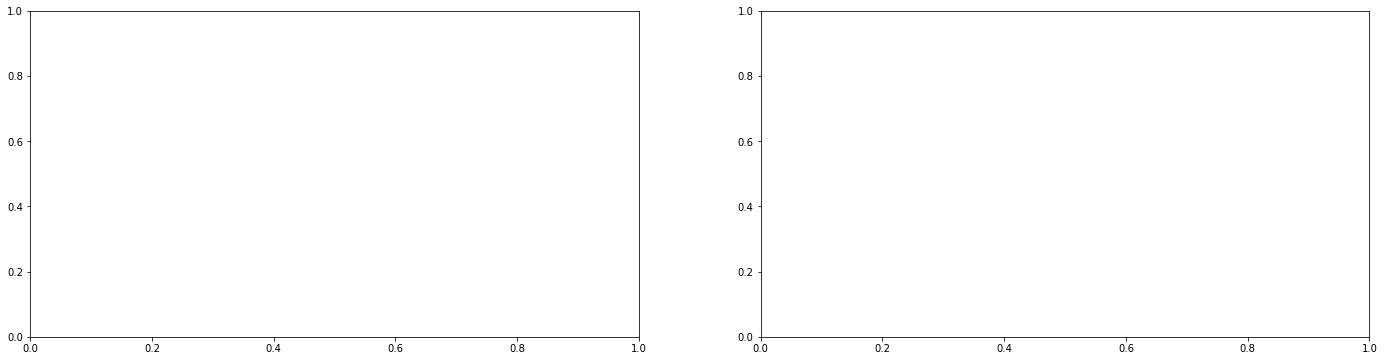

In [96]:
# Membuat 2 Visualisasi Data dalam 1 gambar
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(24,6))

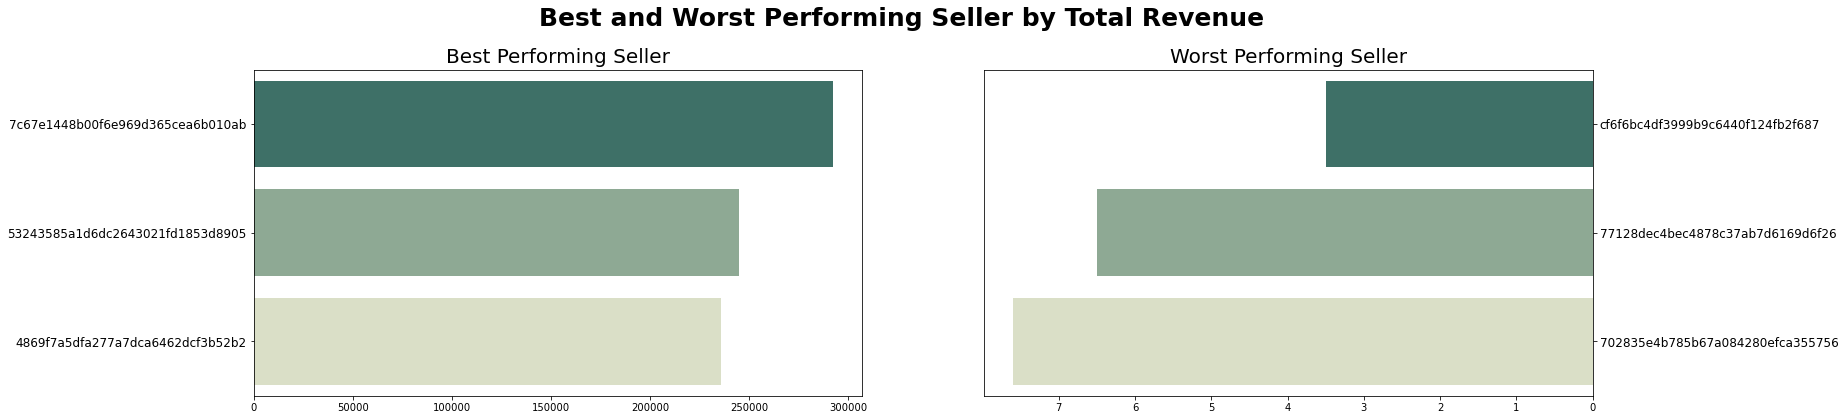

In [97]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(24,6))
colors = ['#36786d', '#8aad91', "#dce3c3"]

sns.barplot(x="revenue", y="seller_id", data=seller_sort_rev_tinggi.head(3), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Seller", y=1.0025, loc="center", fontsize=20)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="revenue", y="seller_id", data=seller_sort_rev_rendah.head(3), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Seller", y=1.0025, loc="center", fontsize=20, )
ax[1].tick_params(axis='y', labelsize=12)
ax[1].invert_xaxis() #rata kanan
ax[1].yaxis.set_label_position("right") #posisi label product name
ax[1].yaxis.tick_right()  #posisi label product name

plt.suptitle("Best and Worst Performing Seller by Total Revenue", y=1.025, fontsize=25, weight="bold")
plt.show()

### Pertanyaan 4 : Produk Apa yang Paling Best Seller?

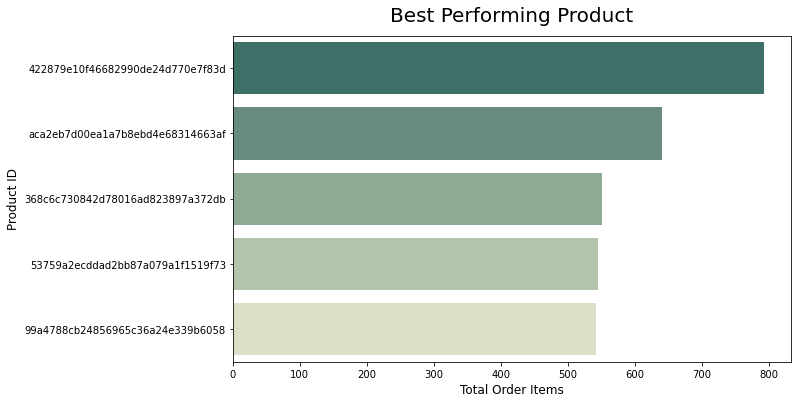

In [98]:
product_best_seller = order_items_df.groupby(by="product_id").order_item_id.sum().sort_values(ascending=False).reset_index()
product_best_seller.head(5)

colors = ["#36786d", "#61927e", "#8aad91", "#b3c8a8", "#dce3c3"]
plt.figure(figsize=(10, 6))
sns.barplot(x='order_item_id', y='product_id', data=product_best_seller.head(5), palette=colors)

plt.title('Best Performing Product', size=20,y=1.025)
plt.xlabel('Total Order Items', size=12)
plt.ylabel('Product ID', size=12)

plt.show()

### Pertanyaan 5 : Bagaimana Performa Penjualan dan Revenue dalam Beberapa Bulan Terakhir?

In [99]:
# Memastikan kolom "order_purchase_timestamp" memiliki tipe data datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Filtering data tahun 2018 sebelum bulan September
all_df_2018 = all_df[(all_df['order_purchase_timestamp'].dt.year == 2018) & (all_df['order_purchase_timestamp'].dt.month < 9)] 

# Resample data berdasarkan bulan
monthly_orders_df = all_df_2018.resample(rule="M", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "revenue": "sum"
})

# # Memformat indeks untuk menampilkan format tahun dan bulan
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

# Reset indeks
monthly_orders_df = monthly_orders_df.reset_index()

# Mengubah nama kolom
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "revenue": "revenue"
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,2018-01,6975,1042912.51
1,2018-02,6531,959557.26
2,2018-03,7005,1083315.62
3,2018-04,6809,1116391.62
4,2018-05,6783,1124649.55
5,2018-06,6113,970639.02
6,2018-07,6182,994945.79
7,2018-08,6393,939171.01


<ipython-input-100-ddb0015b9630>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_2018['order_purchase_timestamp'] = pd.to_datetime(all_df_2018['order_purchase_timestamp'])


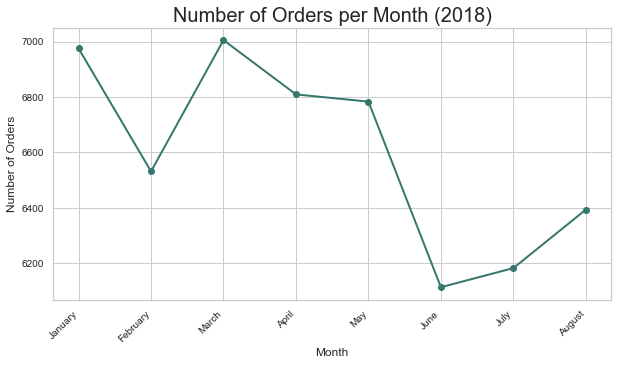

In [100]:
# Memastikan kolom "order_purchase_timestamp" memiliki tipe data datetime
all_df_2018['order_purchase_timestamp'] = pd.to_datetime(all_df_2018['order_purchase_timestamp'])

# Resample data berdasarkan bulan
monthly_orders_df = all_df_2018.resample(rule="M", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "revenue": "sum"
})

# Memformat indeks untuk menampilkan nama bulan
monthly_orders_df.index = monthly_orders_df.index.strftime("%B")
monthly_orders_df = monthly_orders_df.reset_index()

# Mengubah nama kolom
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "revenue": "revenue"
}, inplace=True)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"].values, monthly_orders_df["order_count"].values, marker="o", linewidth=2, color="#36786d")
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20) 
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

In [101]:
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,January,6975,1042912.51
1,February,6531,959557.26
2,March,7005,1083315.62
3,April,6809,1116391.62
4,May,6783,1124649.55


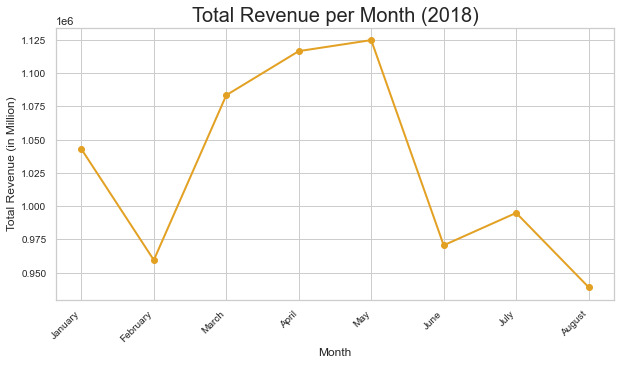

In [102]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"].values, monthly_orders_df["revenue"].values, marker="o", linewidth=2, color="#e3a124")
plt.title("Total Revenue per Month (2018)", loc="center", fontsize=20) 
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (in Million)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 6 : Bagaimana waktu pengemasan mempengaruhi rating yang diberikan?

In [103]:
# Mencari korelasi antara kolom packing_days dengan review_score
correlation = all_df["packing_days"].corr(all_df["review_score"])
print(f"Korelasi antara waktu pengemasan dan rating pelanggan: {correlation}")

Korelasi antara waktu pengemasan dan rating pelanggan: -0.1339399795765589


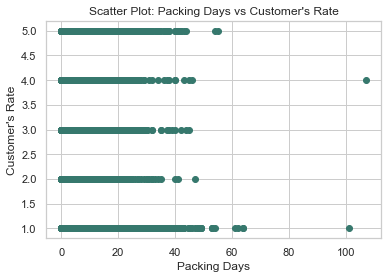

In [104]:
colors = ["#36786d"]
plt.scatter(all_df["packing_days"], all_df["review_score"], color=colors)
plt.xlabel("Packing Days")
plt.ylabel("Customer's Rate")
plt.title("Scatter Plot: Packing Days vs Customer's Rate")
plt.show()

<AxesSubplot:xlabel='review_score', ylabel='packing_days'>

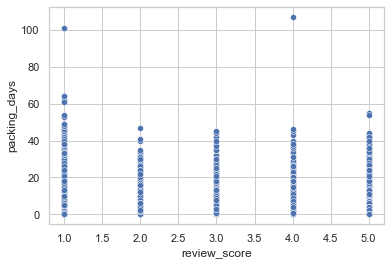

In [105]:
sns.scatterplot(data=all_df, x="review_score", y="packing_days")

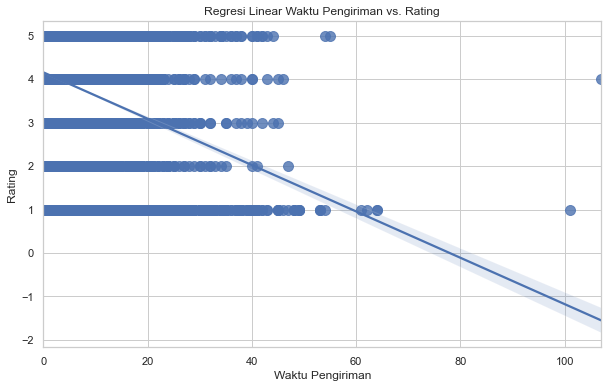

In [106]:
# Membuat regresi linear dan scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x="packing_days", y="review_score", data=all_df, scatter_kws={'s': 100})
plt.title('Regresi Linear Waktu Pengiriman vs. Rating')
plt.xlabel('Waktu Pengiriman')
plt.ylabel('Rating')
plt.show()

### Pertanyaan 7 : Bagaimana waktu pengiriman mempengaruhi rating yang diberikan?

In [107]:
# Mencari korelasi antara kolom shipping_days dengan review_score
correlation = all_df["shipping_days"].corr(all_df["review_score"])
print(f"Korelasi antara waktu pengiriman dan rating pelanggan: {correlation}")

Korelasi antara waktu pengiriman dan rating pelanggan: -0.22045529184106738


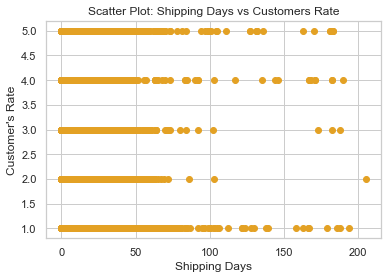

In [108]:
plt.scatter(all_df["shipping_days"], all_df["review_score"], color="#e3a124")
plt.xlabel("Shipping Days")
plt.ylabel("Customer's Rate")
plt.title("Scatter Plot: Shipping Days vs Customers Rate")
plt.show()

## RFM Analysis

### Pertanyaan 8, 9, dan 10 :
- Berapa lama waktu yang telah berlalu sejak pembelian terakhir pelanggan? (Recency)
- Berapa frekuensi pembelian yang dilakukan oleh pelanggan dalam beberapa bulan terakhir? (Frequency)
- Berapa total nilai pembelian yang dilakukan oleh pelanggan? (monetary)

In [109]:
# Specify the analysis date using the last date in the dataset
analysis_date = all_df["order_purchase_timestamp"].max()

# Calculating Recency, Frequency, dan Monetary
rfm_df = all_df.groupby("customer_id").agg({
    "order_purchase_timestamp": lambda x: (analysis_date - x.max()).days,
    "order_id": "count",
    "revenue": "sum"
}).reset_index()

# Name the columns according to RFM
rfm_df.columns = ["customer_id", "recency", "frequency", "monetary"]

# Showing RFM Results
rfm_df.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00


In [110]:
rfm_df.describe()

,recency,frequency,monetary
count,96517.000000,96517.000000,96517.000000
mean,243.939845,1.147466,156.565976
std,153.422744,0.550264,357.193080
min,0.000000,1.000000,0.850000
25%,119.000000,1.000000,47.900000
50%,224.000000,1.000000,89.900000
75%,354.000000,1.000000,159.990000
max,728.000000,22.000000,60480.000000


### Pertanyaan 11 : Bagaimana segmentasi pelanggan yang terbentuk?

Sebelum menentukan segmentasi pelanggan, hal yang saya lakukan adalah mengecek sebaran data RFM untuk mengetahui adanya outliers. Hal ini berguna untuk menentukan binning range dalam segmentasi pelanggan. 

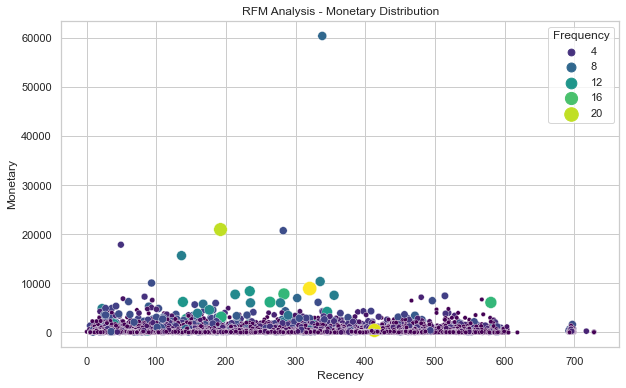

In [111]:
# Sebaran data RFM
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=rfm_df["recency"], y=rfm_df["monetary"], data=rfm_df, size="frequency", sizes=(20, 200), hue="frequency", palette="viridis")

plt.title("RFM Analysis - Monetary Distribution")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title="Frequency")

Karna terdapat outlier pada data diatas, maka hal ini dapat diatasi dengan menggunakan IQR

In [112]:
# Menghitung Nilai IQR
Q1 = rfm_df['monetary'].quantile(0.25)
Q3 = rfm_df['monetary'].quantile(0.75)
IQR = Q3 - Q1

# Mengambil data 1.5xIQR dari Q1 dan Q3
rfm_df_no_outliers = rfm_df[(rfm_df['monetary'] >= Q1 - 1.5 * IQR) & (rfm_df['monetary'] <= Q3 + 1.5 * IQR)]

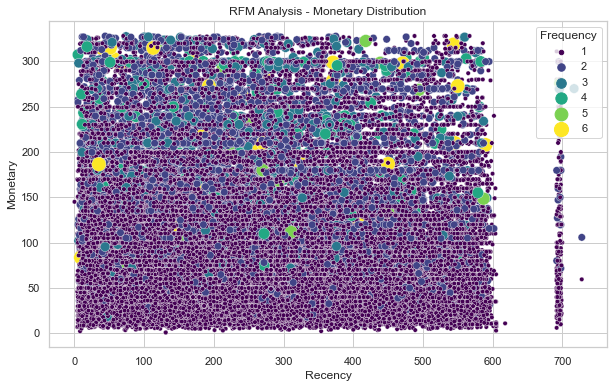

In [113]:
# Sebaran data RFM setelah outliers dihapus
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=rfm_df_no_outliers["recency"], y=rfm_df_no_outliers["monetary"], data=rfm_df_no_outliers, size="frequency", sizes=(20, 200), hue="frequency", palette="viridis")

# Customize the plot
plt.title("RFM Analysis - Monetary Distribution")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title="Frequency")

Melihat parameter statistik pada data frame rfm_df_no_outliers

In [114]:
rfm_df_no_outliers.describe()

,recency,frequency,monetary
count,87603.000000,87603.000000,87603.000000
mean,243.675354,1.091561,97.658703
std,153.045244,0.347436,70.048310
min,0.000000,1.000000,0.850000
25%,120.000000,1.000000,44.100000
50%,225.000000,1.000000,79.900000
75%,354.000000,1.000000,135.000000
max,728.000000,6.000000,328.000000


- **Menentukan Binning Range**

In [115]:
# Viewing rfm_df data description
rfm_df
rfm_df.describe()

,recency,frequency,monetary
count,96517.000000,96517.000000,96517.000000
mean,243.939845,1.147466,156.565976
std,153.422744,0.550264,357.193080
min,0.000000,1.000000,0.850000
25%,119.000000,1.000000,47.900000
50%,224.000000,1.000000,89.900000
75%,354.000000,1.000000,159.990000
max,728.000000,22.000000,60480.000000


Berdasarkan deskripsi diatas, kita dapat menentukan binning range dengan melihat data quartil dengan spesifik

In [116]:
# Specifying the Binning Range Value
recency_bins = [0, 119, 224, 354, 730]
frequency_bins = [0, 1, 22]
monetary_bins = [0, 48, 90, 160, 60480]

# Apply binning range using pd.cut()
rfm_df["R"] = pd.cut(rfm_df["recency"], bins=recency_bins, labels=["R4", "R3", "R2", "R1"])
rfm_df["F"] = pd.cut(rfm_df["frequency"], bins=frequency_bins, labels=["F1", "F2"])
rfm_df["M"] = pd.cut(rfm_df["monetary"], bins=monetary_bins, labels=["M1", "M2", "M3", "M4"])

# Combining the RFM segments
rfm_df["RFM_Segment"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)
rfm_df[["customer_id", "recency", "frequency", "monetary", "RFM_Segment"]].head()

,customer_id,recency,frequency,monetary,RFM_Segment
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,R2F1M2
1,000161a058600d5901f007fab4c27140,413,1,54.90,R1F1M2
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,R1F1M4
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,R1F1M3
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,R3F1M3


In [117]:
# Create a customer_segment Column
rfm_df["Customer_Segment"] = "Undefined"

# Determine the conditions according to the desired customer segmentation
champion_condition = (rfm_df["RFM_Segment"] == "R4F2M4")
loyal_condition = (rfm_df["RFM_Segment"] == "R3F2M4")
at_risk_condition = (rfm_df["RFM_Segment"] == "R2F1M2")
lost_condition = (rfm_df["RFM_Segment"] == "R1F1M1")

# Establish segmentation based on defined conditions
rfm_df.loc[champion_condition, "Customer_Segment"] = "Champion Customers"
rfm_df.loc[loyal_condition, "Customer_Segment"] = "Loyal Customers"
rfm_df.loc[at_risk_condition, "Customer_Segment"] = "At Risk Customers"
rfm_df.loc[lost_condition, "Customer_Segment"] = "Lost Customers"

rfm_df.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM_Segment,Customer_Segment
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,R2,F1,M2,R2F1M2,At Risk Customers
1,000161a058600d5901f007fab4c27140,413,1,54.90,R1,F1,M2,R1F1M2,Undefined
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,R1,F1,M4,R1F1M4,Undefined
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,R1,F1,M3,R1F1M3,Undefined
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,R3,F1,M3,R3F1M3,Undefined


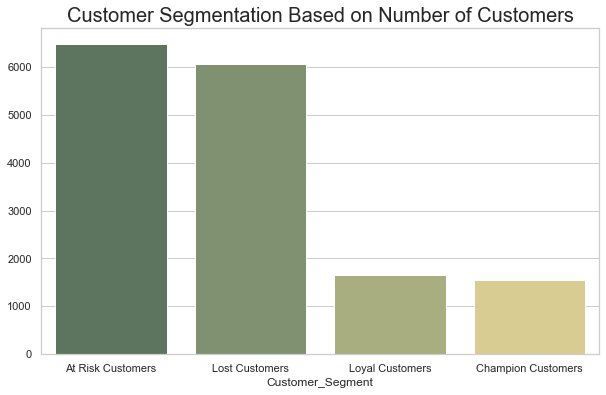

In [118]:
# Selected customer segmentation with 4 predefined categories
selected_segments = ["Champion Customers", "Loyal Customers", "At Risk Customers", "Lost Customers"]
selected_df = rfm_df[rfm_df["Customer_Segment"].isin(selected_segments)]

# Number of customers in each segment
selected_df_counts = selected_df["Customer_Segment"].value_counts()

colors= ['#59785c', '#7f976a', '#adb678', '#e3d388']

# Data visualization of the number of customers in each segment
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_df_counts.index, y=selected_df_counts.values, palette=colors)
plt.title("Customer Segmentation Based on Number of Customers", size=20)
plt.show()

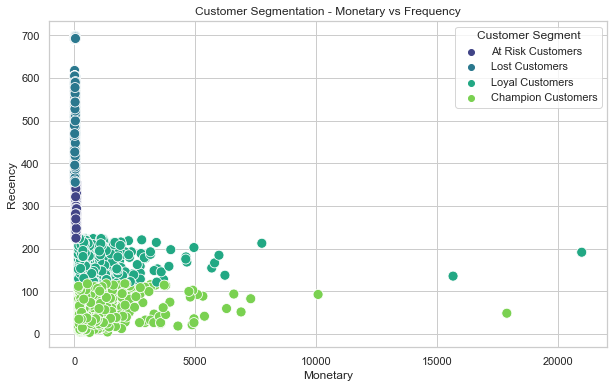

In [119]:
# Pilih segment yang ingin ditampilkan
selected_segments = ["Champion Customers", "Loyal Customers", "At Risk Customers", "Lost Customers"]

# Filter DataFrame untuk hanya menyertakan data dari segment yang dipilih
selected_df = rfm_df[rfm_df["Customer_Segment"].isin(selected_segments)]

# Misalnya, kita akan membuat scatter plot untuk Recency dan Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x="monetary", y="recency", hue="Customer_Segment", data=selected_df, palette="viridis", s=100)
plt.title("Customer Segmentation - Monetary vs Frequency")
plt.xlabel("Monetary")
plt.ylabel("Recency")
plt.legend(title="Customer Segment")
plt.show()

## Conclusion

### Kesimpulan Pertanyaan 1 : Demografi Pelanggan E-Commerce

- Kota dengan jumlah pelanggan tertinggi ada di kota sao paulo, rio de janeiro, belo horizonte, trasilia, dan curitiba
- State dengan jumlah pelanggan tertinggi ada di state SP, RJ, MG, RS, dan PR
- Demografi pelanggan ini dapat digunakan sebagai pertimbangan dalam menentukan strategi marketing atau ekspansi pasar ke daerah-daerah tersebut.

### Kesimpulan Pertanyaan 2 : Ketepatan Estimasi Pengiriman

Berdasarkan pie chart yang telah divisualisasikan, dapat disimpulkan bahwa 92.4% pengiriman yang selesai sebelum tanggal estimasi barang sampai (arrived quickly), namun masih terdapat 7.6% pengiriman yang selesai tidak tepat waktu (arrived delayed). Hal ini menunjukkan bahwa tanggal estimasi barang sampai belum menunjukkan hasil yang cukup akurat.

### Kesimpulan Pertanyaan 3 : Seller dengan Revenue Terbesar dan Terkecil

Berdasarkan bar chart yang telah divisualisasikan, maka dapat disimpulkan best performing seller adalah seller_id 7c67e1448b00f6e969d365cea6b010ab dengan total revenue sebesar 292489. Sedangkan, worst performing seller adalah seller_id cf6f6bc4df3999b9c6440f124fb2f687 dengan total revenue sebesar 3.5.

### Kesimpulan Pertanyaan 4 : Product Paling Best Seller

Berdasarkan diagram batang yang telah divisualisasikan, 3 product paling best seller adalah product_id 422879e10f46682990de24d770e7f83d, aca2eb7d00ea1a7b8ebd4e68314663af, dan 368c6c730842d78016ad823897a372db dengan total produk yang terjual sebesar 793, 640, dan 551 unit.

### Kesimpulan Pertanyaan 5 : Performa Penjualan dan Revenue pada Tahun 2018

Berdasarkan Total Pesanan
- Jumlah pesanan tertinggi ada di bulan Maret tahun 2018 dengan pemesanan sebanyak 7005 order_id
- Jumlah pesanan terendah ada di bulan Juni tahun 2018 dengan pemesanan sebanyak 6113 order_id
- Kenaikan jumlah pesanan paling signifikan terdapat di bulan Februari-Maret sebesar  196 pesanan
- Penurunan jumlah pesanan paling signifikan terdapat di bulan Mei-Juni sebesar 670 pesanan

Berdasarkan Revenue
- Jumlah revenue tertinggi ada di bulan Mei tahun 2018 dengan total revenue 1124649.55
- Jumlah revenue terendah ada di bulan Agustus tahun 2018 dengan total revenue 939171.01
- Kenaikan revenue paling signifikan terdapat di bulan Februari-Maret sebesar 123578.36
- Penurunan revenue paling signifikan terdapat di bulan Mei-Juni sebesar 154010.53

### Kesimpulan Pertanyaan 6, 7 : Pengaruh Waktu Pengemasan dan Pengiriman terhadap Rating yang Diberikan

**Waktu Pengemasan VS Rating** : Berdasarkan analisis yang telah dilakukan, didapatkan nilai korelasi antara waktu pengemasan dengan rating sebesar -0.134. Maka dapat disimpulkan waktu pengemasan dengan rating berkorelasi negatif yang berarti semakin lama waktu pengemasan maka akan semakin rendah juga rating yang diberikan oleh customer. Namun, karena nilai korelasinya cukup kecil korelasi ini tidak terlalu kuat sehingga perlu dilakukan analisis lebih lanjut terhadap faktor-faktor lain yang mempengaruhi.

**Waktu Pengiriman VS Rating** : Berdasarkan analisis yang telah dilakukan, didapatkan nilai korelasi antara waktu pengiriman dengan rating sebesar -0.220. Maka dapat disimpulkan waktu pengiriman dengan rating berkorelasi negatif yang berarti semakin lama waktu pengiriman maka akan semakin rendah juga rating yang diberikan oleh customer. Walaupun nilai korelasi waktu pengiriman dengan rating lebih besar dari analisis sebelumnya, nilai korelasi ini juga termasuk kecil sehingga korelasi ini tidak terlalu kuat dan perlu dilakukan analisis lebih lanjut terhadap faktor-faktor lain yang mempengaruhi.

### Kesimpulan Pertanyaan 8-11 : Analisis RFM

Berdasarkan nilai recency, frequency, dan juga monetary, didapatkan sebuah segmentasi customer berdasarkan perilaku sebelumnya. Segmentasi yang didapatkan berupa segmentasi loyalitas pelanggan yang terbagi menjadi :
- Champion Customers : Pelanggan yang baru-baru ini melakukan pembelian (Recency rendah), sering berbelanja (Frequency tinggi), dan mengeluarkan jumlah uang yang signifikan (Monetary tinggi). Champion Customer harus diperhatikan dengan baik agar tetap konsisten dalam berbelanja, mungkin bisa memberikan perlakuan khusus seperti pemberian voucher reward dll.
- Loyal Customers : Meskipun mungkin tidak baru-baru ini melakukan pembelian, namun pelanggan ini sering berbelanja (Frequency tinggi) dan telah menjadi pelanggan setia selama beberapa waktu. Monetary dapat bervariasi, tetapi mereka memberikan kontribusi yang stabil. Segmentasi ini potensi untuk meningkatkan nilai pelanggan dengan strategi retensi.
- At Risk Customers : Pelanggan pada segmentasi ini berpotensi untuk beralih ke pesaing atau tidak aktif. Maka perlu dilakukan strategi untuk menarik at risk customer kembali.
- Lost Customers : Segmentasi ini memiliki nilai recency, frequency, dan monetary yang rendah. Kemungkinan besar sudah tidak tertarik atau beralih ke pesaing. Maka hal yang perlu diperhatikan adalah fokus pada strategi pemasaran untuk mereaktivasi kembali lost customers ini.

Segmentasi-segmentasi  tersebut dapat mengarahkan upaya pemasaran, penjualan, dan retensi pelanggan sesuai dengan kebutuhan unik setiap segmen. Analisis ini juga dapat membantu dalam mengidentifikasi peluang pengembangan produk, personalisasi layanan, dan meningkatkan kepuasan pelanggan secara keseluruhan.

Segmentasi Customer yang telah dilakukan menghasilkan banyaknya At Risk Customers dan Lost Customers, sehingga ini menjadi catatan khusus untuk diatasi. Seperti menerapkan strategi marketing yang optimal untuk menarik kembali pelanggan tersebut dan berbelanja di e-commerce ini